# Final Project Proposal

Kenneth E. Bellock
 
AS.430.618.81.SP19 Advanced Python Scripting for GIS

Johns Hopkins University,
Krieger School of Arts and Sciences,
3400 N. Charles Street,
Baltimore, MD 21218

April 18, 2019

<!---

## Objective
The project proposal builds on the project idea but provides a lot more detail. Specifically, this project proposal includes:

1. The title of your proposed tool.

2. Specific functionality of the tool from a user's perspective - what are the inputs and what are the outputs? Also, discuss why this is important or useful.

3. A detailed description of how the tool works - what is the actual workflow accomplished to go from the inputs to the outputs? Also, discuss why this cannot be accomplished using existing tools.

4. A brief description of sample data. You will need some sample data to develop/test your code and demonstrate that the tool works.

5. An initial outline of your major coding challenges. Try to break down the workflow into various logical components and discuss each component. No actual code is required, but some rough pseudo-code is helpful here. This will assist in identifying which modules/functions you are going to need.

When writing your project proposal, keep the following expectations for your final project in mind:

scripts can utilize ArcPy, or open source libraries or a combination
scripts are developed for distributing/sharing with others, so there should be very limited to no hard-coding of values
when relying mostly on ArcPy, a finished script tool interface is expected - when relying exclusively on open source libraries no interface is required, but the scripts should be user-friendly (e.g. starting off the script with user-defined variables, then no more hard-coding in the rest of the script
you can use a single script or multiple scripts, your choice
documentation needs to be provided to users to assist with running the tool

-->

## Title
Alpha Shape Toolbox

## Abstract
Creating alpha shapes around sets of points usually requires a visually interactive step where the alpha parameter for a concave hull is determined by iterating over or bisecting values to approach a best fit to data being studied.  This capability is useful in several application areas.  In defense contracting, this might be useful in the analysis of coverage areas of asset positioning in mission planning.  It might also be useful in nature studies to determine home ranges or migration patterns from captured telemetry. The alpha shape toolbox will provide workflows to shorten the development loop on this manual process by providing a user interface with an embedded map visualization and user inputs to specify an input feature class, an alpha parameter, and an output feature class field.  As the user modifies the alpha parameter, the resulting alpha shape will be displayed in the map visualization.  Once the ideal alpha shape is determined, the user will be able to save the result to an output feature class.  A console application will also be provided to generate alpha shapes from the command line, and a python API will be provided to aid in the scripted generation of alpha shapes.  In addition to the utility of being able to quicly iterate on alpha parameters to genearte concave hulls, the framework of this toolset will provide a template for generating GIS toolsets accessible from python, the console, or graphical user interfaces without the licensing restrictions of proprietary toolsets and without having a python installation for the console and user interface.

https://en.wikipedia.org/wiki/Alpha_shape

*Note: If time does not permit the completion of a user interface, it will be de-scoped at the Progress Report.  The alpha shape api utilized within Jupyter Notebook will then be substituted to tighten the developent loop on alpha parameter selection.*

## Use Cases (Specific Functionality of the Tool from a Users Perspective)

The following use cases describe the from a users perspective the pre-conditions, flow, and post conditions of the desired tool capabilities supporting the overall workflow shown in the block diagram below.

![](media/flow1.png)

### Generate a Visualization in Jupyter Notebook

#### Pre-Condition
Given the alpha shape python api and a Jupyter Notebook interface.

#### Flow
1. When a user calls the api function `alpha_shape` with a list of points and an alpha parameter.
2. And when the user converts the resulting shape to a `GeoSeries` object.

#### Post-Condition
Then the user will be able to visualize the resulting alpha shape within the Jupyter Notebook.

### Write Result to ESRI Shapefile

#### Pre-Condition
Given the alpha shape command line tool and an input shapefile.

#### Flow
1. When the user calls the alpha shape command line tool with the input shapefile, an alpha parameter, and an output shapefile path.

#### Post-Condition
Then an output shapefile will be generated at the specified path with a geometry containing the alpha shape.

### Automate Alpha Parameter Optimization

#### Pre-Condition
Given the alpha shape api, and an input shapefile.

#### Flow
1. When a user calls the api function `find_alpha` with the input shapefile as an argument.

#### Post-Condition
Then the user will be returned either an alpha parameter that best fits the input data in one polygon, or the value of `None` if an optimized solution cannot be found.

### Visualize Alpha Parameter Modifications (Optional)

#### Pre-Condition
Given the alpha shape visualization tool, and an input shapefile.

#### Flow
1. When a user opens the alpha shape visualization tool.
2. And when a user selects an input shapefile.
3. And when a user selects an alpha value.

#### Post-Condition
Then the resulting alpha shape will be displayed in the map visualization within the tool.

## Design (Detailed Description)
### Alpha Shape Algorithm
The alpha shape algorithm will take a set of points supplied by the user, and convert it to a shapely `MultiPoint` object for processing. If the supplied list of points contains three or less points, a convex hull surrounding these points will be returned to the user.  Otherwise, it will use SciPy's `scipy.spatial.Delaunay()`, (https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.Delaunay.html) to create a list of triangles from the given points.  It will then loop over the triangles filtering out edges that do not meet the alpha parameter characteristics computed through evaluation of the lengths of the triangle edges flowing into the calculation for the area of the triangle then flowing into the radius filter.  The prototype code for this algorithm can be found in the Proof of Concept section below.

A python api will be created as a package that with calls to generate alpha shapes and to iterate on ideal alpha parameters for single polygon encapsulation of input data.

A command line interface will be generated utilizing the `argparse` toolbox that will include options for tool version number, help, logging verbosity, input shapefile specification, output shapefile specification, and alpha parameter specification.

If time permits, a graphical user interface will be created to aid in alpha parameter selection.  This will utilize WxPython, the matplotlib WxAgg backend, and cartopy for the map visualization pane.


## Prior Art
The following blog entry contains relevant python code for determining alpha shapes, but it contains divide by zero errors as well as a few other deficiencies.  The information in this blog post still served as a foundation to the idea for this project.

http://blog.thehumangeo.com/2014/05/12/drawing-boundaries-in-python/

No other existing toolbox could be found utilizing the `pip search` command for alpha shape toolboxes, and no other toolboxes for python could be found to support the use cases documented in this proposal.

## Core Capabilities Covered
* Argument Parsing
* API Documentation
* Docstrings
* Unit Testing
* Freezing Python Console Applications
* Embedding GIS in User Interfaces
* Calculating alpha shape geometries
* Loading ESRI Shapefiles
* Writing ESRI Shapefiles
* Freezing Python Graphical Applications (Optional)

## Libraries Used
* GeoPandas
* fiona
* wxPython
* scipy
* sphinx
* shapely
* cartopy

## Deliverables
* Python API
* Console Application
* Documentation
* Graphical User Interface (Optional)

## Sample Data

Sample data will be drawn from the Lesson 7 `airports.shp` feature class.  This is a data set of airports in the state of alaska and is ideal for studying how a set of real data points can be fit with an alpha shape.

The following code and plot visualizes the data in this input feature class.

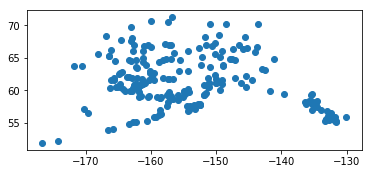

In [5]:
%matplotlib inline
import os
import geopandas
SCRIPT_PATH = os.getcwd()
data = os.path.join(SCRIPT_PATH, 'airports.shp')
gdf = geopandas.read_file(data)
gdf.plot()

In [6]:
gdf.crs

{'init': 'epsg:4269'}

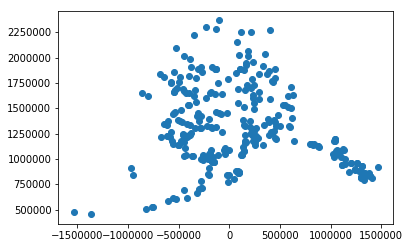

In [7]:
%matplotlib inline
import os
import geopandas
data = '/nfs/home/bellockk/Downloads/Public_Airports_March2018.shp'
gdf = geopandas.read_file(data)
gdf.plot()

In [8]:
gdf.crs

{'init': 'epsg:3338'}

POLYGON ((-6438674.031567217 10835090.05265739, -6548529.507904032 10908448.07145896, -6565018.734085675 10990014.69510036, -6490727.220787664 11135564.68781042, -6421271.966211027 11202234.47251259, -6258931.017288597 11441732.6282568, -6238738.572385293 11526146.27642774, -6216861.625704523 11708880.7645461, -6272920.184475828 12041041.37414304, -6536849.573542912 12285096.25688372, -6539882.73941991 12286308.64952378, -6603336.388347096 12336361.5514626, -6637499.558141938 12392365.79653259, -6764342.745286693 12709100.67931456, -6829774.105567669 12797009.40791823, -6852004.392278408 12912274.89002726, -6880520.183352967 12988395.84385819, -6953218.07530398 13136747.76825139, -6977389.57445226 13200988.95549032, -7119311.271372903 13737847.44127489, -7135293.743643003 13910810.68498834, -6615417.512528065 13422663.64817197, -5946918.081445905 13459338.83474334, -5773793.294007522 13287436.00631616, -5551249.144254518 13157283.08084568, -5440308.590277952 12952727.91126007, -5365870

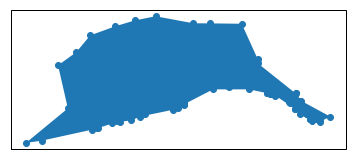

In [43]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import geopandas

SCRIPT_PATH = os.getcwd()
fname = os.path.join(SCRIPT_PATH, 'Public_Airports_March2018.shp')
gdf = geopandas.read_file(fname)

alpha = get_alpha(gdf.to_crs(ccrs.AlbersEqualArea().proj4_init)['geometry'], 0.000002)
alpha_gdf = geopandas.GeoDataFrame(geopandas.GeoSeries(alpha)).rename(columns={0:'geometry'}).set_geometry('geometry')
alpha_gdf.crs = ccrs.AlbersEqualArea().proj4_init
print(alpha)

# ax = plt.axes(projection=ccrs.Robinson())
ax = plt.axes(projection=ccrs.PlateCarree())
# ax = plt.axes(projection=ccrs.AlbersEqualArea())
gdf_proj = gdf.to_crs(ccrs.Robinson().proj4_init)
ax.scatter([p.x for p in gdf_proj['geometry']],
           [p.y for p in gdf_proj['geometry']],
           transform=ccrs.Robinson())
ax.add_geometries(alpha_gdf['geometry'], crs=ccrs.AlbersEqualArea())
# ax.add_geometries(gdf.to_crs(ccrs.Robinson().proj4_init)['geometry'],
#                   crs=ccrs.Robinson())

plt.show()

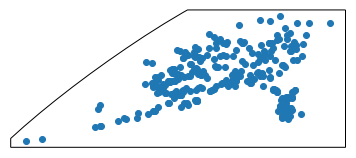

In [12]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import geopandas

SCRIPT_PATH = os.getcwd()
fname = os.path.join(SCRIPT_PATH, 'Public_Airports_March2018.shp')
gdf = geopandas.read_file(fname)
gdf_proj = gdf.to_crs(ccrs.Robinson().proj4_init)

ax = plt.axes(projection=ccrs.Robinson())
ax.scatter([p.x for p in gdf_proj['geometry']],
           [p.y for p in gdf_proj['geometry']],
           transform=ccrs.Robinson())
# ax.add_geometries(gdf.to_crs(ccrs.Robinson().proj4_init)['geometry'],
#                   crs=ccrs.Robinson())

plt.show()

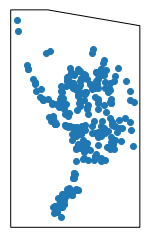

In [14]:
ax = plt.axes(projection=ccrs.AlbersEqualArea())
ax.scatter([p.x for p in gdf_proj['geometry']],
           [p.y for p in gdf_proj['geometry']],
           transform=ccrs.Robinson())
plt.show()

![](media/input.png)

## Proof of Concept

In [1]:
import itertools
import math
from shapely.ops import cascaded_union, polygonize
from shapely.geometry import MultiPoint, MultiLineString
from scipy.spatial import Delaunay
import numpy as np

def get_alpha(points, alpha):
    """
    Compute the alpha shape (concave hull) of a set
    of points.

    @param points: Iterable container of points.

    @param alpha: alpha value to influence the
        gooeyness of the border. Smaller numbers
        don't fall inward as much as larger numbers.
        Too large, and you lose everything.

    Args:

        `points` (``list``): an iterable container of points

        `alpha` (``float``): alpha value

    Returns:

        ``Polygon``: the polygon of the concave hull
    """
    points = MultiPoint(list(points))

    # If given a triangle for input, or an alpha value of zero or less,
    # return the convex hull.
    if len(points) < 4 or alpha <= 0:
        return points.convex_hull

    coords = np.array([point.coords[0] for point in points])
    tri = Delaunay(coords)
    edges = set()
    edge_points = []

    # Loop over triangles
    for ia, ib, ic in tri.vertices:
        pa = coords[ia]
        pb = coords[ib]
        pc = coords[ic]

        # Lengths of sides of triangle
        a = math.sqrt((pa[0] - pb[0])**2 + (pa[1] - pb[1])**2)
        b = math.sqrt((pb[0] - pc[0])**2 + (pb[1] - pc[1])**2)
        c = math.sqrt((pc[0] - pa[0])**2 + (pc[1] - pa[1])**2)

        # Semiperimeter of triangle
        s = (a + b + c) * 0.5

        # Area of triangle by Heron's formula
        area = math.sqrt(s * (s - a) * (s - b) * (s - c))

        # Radius Filter
        if area > 0 and a * b * c / (4.0 * area) < 1.0 / alpha:
            for i, j in itertools.combinations([ia, ib, ic], r=2):
                if (i, j) not in edges and (j, i) not in edges:
                    edges.add((i, j))
                    edge_points.append(coords[[i, j]])

    m = MultiLineString(edge_points)
    triangles = list(polygonize(m))
    return cascaded_union(triangles)

### Function used to demonstrate different alpha values

In [6]:
def test_alpha(alpha):
    alpha = get_alpha(gdf.geometry, alpha)
    agdf = geopandas.GeoDataFrame(geopandas.GeoSeries(alpha))
    agdf = agdf.rename(columns={0:'geometry'}).set_geometry('geometry')
    agdf.plot()

### Alpha = 0 (Convex Hull)

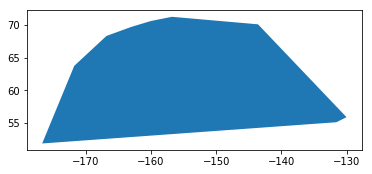

In [7]:
test_alpha(0)

![](media/alpha0.png)

### Alpha = .1

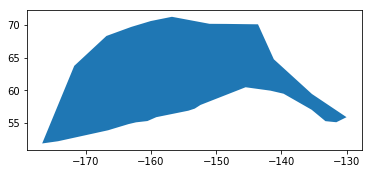

In [8]:
test_alpha(.1)

![](media/alpha1.png)

### Alpha = .2

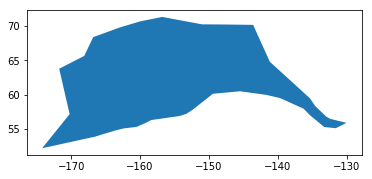

In [9]:
test_alpha(.2)

![](media/alpha2.png)

### Alpha = .3

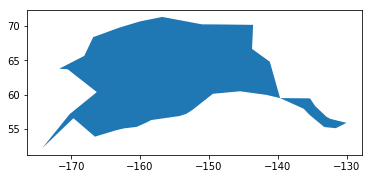

In [10]:
test_alpha(.3)

![](media/alpha3.png)

### Alpha = .4

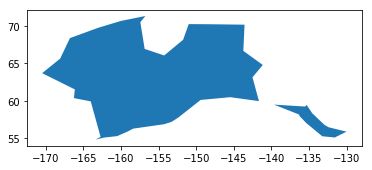

In [11]:
test_alpha(.4)

![](media/alpha4.png)

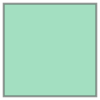

In [15]:
import shapely
a = shapely.geometry.Polygon([(0., 0.), (0., 1.), (1., 1.), (1., 0.)])
a

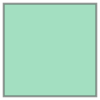

In [18]:
b = get_alpha([(0., 0.), (0., 1.), (1., 1.), (1., 0.)], 1.e-9)
b

In [21]:
b.equals(a)

In [22]:
b == a

False